# 2019/02-Fordgobike-Tripdata for Greater San Francisco Bay Area 
## by Abdulhamid Ibrahim

## Introduction  

> This data set contains information rides by individuals made in a bike-sharing system covering the greater San Francisco Bay area for the month of February 2019.
The data set has been stored as a pandas dataframe, It has 16 columns and 183412 rows. There are 3 main areas: 
1. Ride duration
2. Information about the station
3. Information about the riders



## Preliminary Wrangling


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline


# suppress warnings 
import warnings
warnings.simplefilter("ignore")

In [2]:
r="201902-fordgobike-tripdata.csv"
dfc = pd.read_csv(r)
dfc.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No


#### Data Assesment 

In [3]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

ISSUES
+ Start_time,end_time,start_station_id,end_station_id, bike_id have wrong datatypes
+ There aresome features have missing values.


In [4]:
dfc.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
dfc.duplicated().sum()

0

In [6]:
dfc[dfc.member_gender.isna()]



,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [7]:
dfc.isna().sum()/dfc.count()*100

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.107524
start_station_name         0.107524
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.107524
end_station_name           0.107524
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
member_birth_year          4.718893
member_gender              4.718893
bike_share_for_all_trip    0.000000
dtype: float64

#### Cleaning

In [8]:
df_ride = dfc.copy()

In [9]:
df_ride.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No


Issue
- incorrect dataypes



Define
- change the datatypes of the  featuresto the correct datatypes


Code


In [10]:
# convert start_time and end_time into datetime 
df_ride.start_time = pd.to_datetime(df_ride.start_time)
df_ride.end_time = pd.to_datetime(df_ride.end_time)

# convert start_station_id, end_station_id, and bike_id into strings
df_ride.start_station_id = df_ride.start_station_id.astype('str')
df_ride.end_station_id = df_ride.end_station_id.astype('str')
df_ride.bike_id = df_ride.bike_id.astype('str')

# convert user_type and member_gender into categories
df_ride.user_type = df_ride.user_type.astype('category')
df_ride.member_gender = df_ride.member_gender.astype('category')

Test

In [11]:
df_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

Issue
- missinig values

Define
_ drop the missing values since it just a very small percentage of the whole dataset

Code

In [12]:
df_ride.dropna(inplace=True)
df_ride = df_ride.reset_index(drop= True)

Test

In [13]:
df_ride.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [14]:
df_ride.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### Feature Engineering

<p  >There are some features which will aid my analysis that are not present here.
we will engineer them from the features we have already. 
since I know that all these rides took place during the month of february in the year 2019.
I will get from the start time the <b> day and hour </b> and also calculate  <b> age </b> fom member_birth_year.
I will also calculate  <b> distance </b>   travelled from the latitude and longitude using the <b>haversine formular</b></p>

In [15]:
df_ride['duration_min'] = df_ride['duration_sec']/60   # to get the duration in minutes
df_ride['date'] = df_ride.start_time.dt.strftime('%Y-%m-%d') # to get the date
df_ride['hour'] = df_ride.start_time.dt.strftime('%H')    # to get the hour 
df_ride['day'] = df_ride.start_time.dt.strftime('%A')     # to get the day 
df_ride['age'] = 2021 - df_ride.member_birth_year
df_ride.age = df_ride.age.astype('int')

In [16]:

def haversine(lat1, lon1, lat2, lon2):
    """
    Take as input start latitude, start longitude, end latitude, and end longitude, 
    and return distance between this two locations in meters.
    """
    # distance between latitudes
    # and longitudes
    dLat = (lat2 - lat1) * np.pi / 180.0
    dLon = (lon2 - lon1) * np.pi / 180.0

    # convert to radians
    lat1 = (lat1) *np.pi / 180.0
    lat2 = (lat2) * np.pi / 180.0

    # apply formulae
    a = (pow(np.sin(dLat / 2), 2) +
        pow(np.sin(dLon / 2), 2) *
            np.cos(lat1) * np.cos(lat2));
    rad = 6371000
    c = 2 * np.arcsin(np.sqrt(a))
    return rad * c #distance in meters


In [17]:
df_ride['distance_m'] = haversine(dfc.start_station_latitude, dfc.start_station_longitude, dfc.end_station_latitude, dfc.end_station_longitude)

In [18]:
df_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [19]:
df_ride.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,date,hour,day,age,distance_m
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,869.750000,2019-02-28,17,Thursday,37,544.708503
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,1030.900000,2019-02-28,12,Thursday,49,1742.999137
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,608.166667,2019-02-28,17,Thursday,32,2704.545131
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,26.416667,2019-02-28,23,Thursday,47,260.738544
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,29.883333,2019-02-28,23,Thursday,62,2409.301416


In [20]:
df_ride.columns


Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'duration_min', 'date', 'hour', 'day', 'age', 'distance_m'],
      dtype='object')

In [21]:
df_ride.drop('bike_share_for_all_trip',axis=1,inplace=True) #dropping the column
df_ride.drop('end_station_latitude',axis=1,inplace=True) # dropping the column
df_ride.drop('end_station_longitude',axis=1,inplace=True) #dropping the column
df_ride.drop('start_station_latitude',axis=1,inplace=True) #dropping the column
df_ride.drop('start_station_longitude',axis=1,inplace=True) # dropping the column
df_ride.drop('end_station_id',axis=1,inplace=True) #dropping the column
df_ride.drop('start_station_id',axis=1,inplace=True) #dropping the column

### Univariate Exploration

In [22]:


ordinal_var_dict = {'day': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                    'hour': ['00', '01','02','03','04','05','06','07','08','09','10',
                             '11','12','13','14','15''16','17','18','19','20','21','22','23']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_ride[var] = df_ride[var].astype(ordered_var)

First i want to take a look at the distribution of our first variable of interest which is the durtion in minute. 

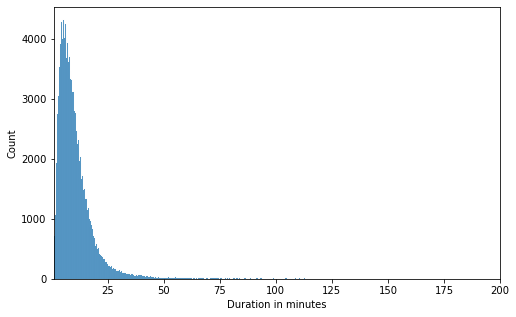

In [23]:
binsize = 100


plt.figure(figsize=[8, 5])
sb.histplot(data = df_ride, x = 'duration_min')

plt.xlim(1,200)

plt.xlabel('Duration in minutes')
plt.show()

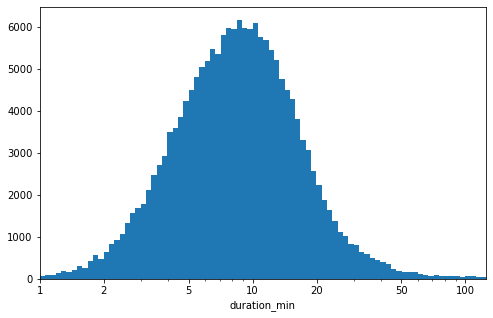

In [24]:

plt.figure(figsize=[8, 5])
plt.hist(data = df_ride, x = 'duration_min', bins = 10**np.arange(0 , 4+0.025, 0.025))

plt.xscale('log')
plt.xticks([1,2,5,10,20,50,100],[1,2,5,10,20,50,100])

plt.xlim(1,125)

plt.xlabel('duration_min')
plt.show()


Duration in minute is long-tailed distributed at first when on standard scale.The distribution on a log scale has its peak at approximately 7 and 12 minutes  from the distribution we can see that trips that lasted from 6- 15 minutes are more in the data set. Also over 90% of the trips were less than 30min which will be explore further during the analysis.

I am now going to explore the distribution of the next variable of interest which is distance between the start and end station in meters(distance_m)

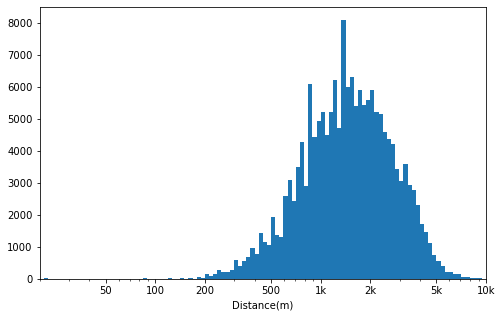

In [25]:
bins = 10 ** np.arange(1, 4+0.025, 0.025)
plt.figure(figsize=[8, 5])
plt.hist(data = df_ride, x = 'distance_m', bins = bins)
plt.xscale('log')
#plt.xlim(5,)
plt.xticks([10,50,100,200,500, 1e3, 2e3, 5e3, 1e4, 2e4], [10,50,100,200,500, '1k', '2k', '5k', '10k', '20k'])
plt.xlim(20,10000)

plt.xlabel('Distance(m)')
plt.show()


The distribution of distance covered dring the each ride is unimodal. it has it mode around the 1500m mark.

After this we take a look at the frequency of some of the catedorical variables of interest 

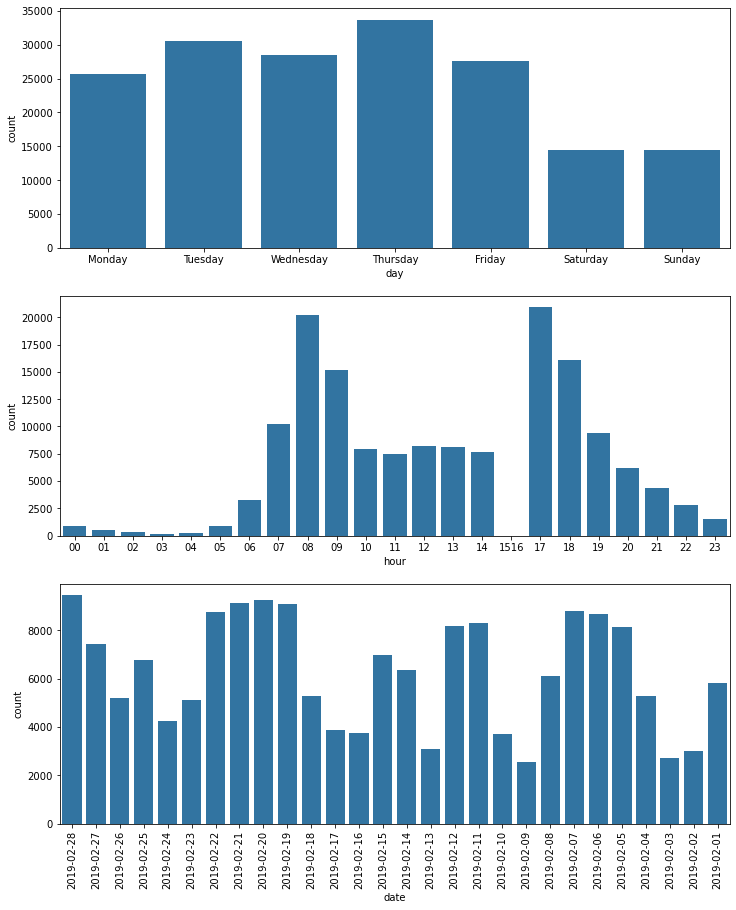

In [26]:
fig, ax = plt.subplots(nrows=3, figsize = [12,15])

default_color = sb.color_palette()[0]
sb.countplot(data = df_ride, x = 'day', color = default_color, ax = ax[0],order = ordinal_var_dict['day'])
sb.countplot(data = df_ride, x = 'hour', color = default_color, ax = ax[1], order = ordinal_var_dict['hour'])
sb.countplot(data = df_ride, x = 'date', color = default_color, ax = ax[2])
plt.xticks(rotation= 90)

plt.show()

From the above plots we can see that ride sharing during the weeekdays are more than during the weekends with the highest rate on thursday.At 8:00 and 17:00, which is usaully the resumption and closing time respectively ride sharing were highest.For the month of february some of the days have low number of ride share and other have high number of rideshare, it shall be explored whether this days are weekdays or weekends during the next stage of exploration

I am going to use waffle plots to explore the distribution of type of user and the gender of members.
PS this can be done with better with barplot but for the sake of this project I am employing the use of waffle plot. 

In [27]:
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

percentage_blocks(df_ride, 'member_gender')

Male      75
Female    23
Other      2
Name: member_gender, dtype: int32

In [28]:

def waffle_plot(df,var):
    """
    Take as input a dataframe as df and variable as var returns a waffle plot 
    of the distribution of the variable in the dataset
    """

    waffle_counts = percentage_blocks(df, var)

    prev_count = 0
    # for each category,
    for cat in range(waffle_counts.shape[0]):
        # get the block indices
        blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
        # and put a block at each index's location
        x = blocks % 10 # use mod operation to get ones digit
        y = blocks // 10 # use floor division to get tens digit
        plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
        prev_count += waffle_counts[cat]

        plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
        plt.axis('off')
        plt.axis('square')
        plt.title(f'waffle plot of {var} distribution'.title())




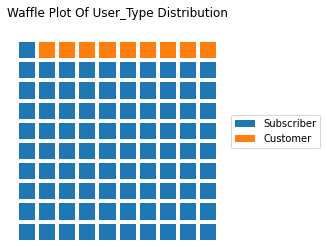

In [29]:
waffle_plot(df_ride, 'user_type')


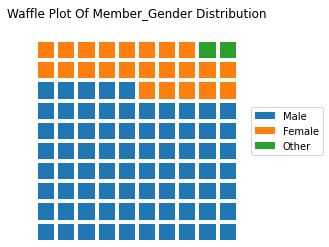

In [30]:
waffle_plot(df_ride, 'member_gender')

Over 91 percent of the total members are subscribers while the other 9 percent are custommers. 75 percent of the users are Male, 23 percent of users are Female while the remaining 2 percent are Other. 

Next I go on to explore the age distribtion among users.

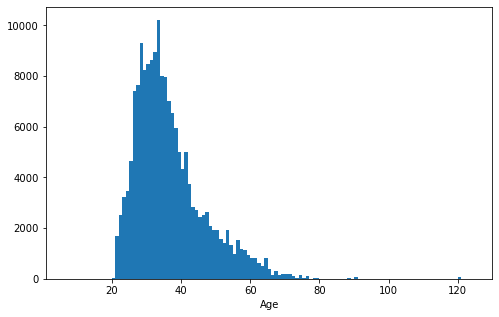

In [31]:
bins = np.arange(1, 121+1, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = df_ride, x = 'age', bins = bins)

plt.xlim(1,130)

plt.xlabel('Age')
plt.show()


Age distribution is skewed to the right. It has a distribition of ages between 20 - 45 which is expected since some of the  most active population in bike riding are usually youth between this age range. Also it worthy of not that there is an outlier in the age distribution. which I am going to check and fix in the next cells.

In [32]:

df_ride.describe()


,duration_sec,member_birth_year,duration_min,age,distance_m
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,1984.803135,11.733379,36.196865,1692.520874
std,1642.204905,10.118731,27.370082,10.118731,1098.828952
min,61.000000,1878.000000,1.016667,20.000000,0.000000
25%,323.000000,1980.000000,5.383333,29.000000,910.955336
50%,510.000000,1987.000000,8.500000,34.000000,1432.472546
75%,789.000000,1992.000000,13.150000,41.000000,2228.618171
max,84548.000000,2001.000000,1409.133333,143.000000,69469.240682


from the statistics, 1878 is the oldest birth year and 143 is the highest age which is not
an age strong enogh to use the bike sharing system. so this colum will be dropped


In [33]:
print(df_ride[df_ride.member_birth_year < 1900]['age'])
df_ride = df_ride[df_ride.member_birth_year > 1900]
df_ride = df_ride.reset_index(drop= True)


26352    143
Name: age, dtype: int32


### Discussion of  the distributions of  variables of interest. 

> Duration in minute is long-tailed distributed at first when on standard scale.The distribution of duration in minutes after it has been transformed to a log scale has its peak at approximately 7 and 12 minutes  from the distribution we can see that trips that lasted from 6- 15 minutes are more in the data set. 

> The distribution of distance covered dring the each ride is unimodal. it has it mode around the 1500m mark. Trip were mostly between start and end stations with aproximately 700m - 4000m between them. 

> I noticed that from 7-9 am and from 4-6pm which are the conventional resumption and closing time , ride-sharing were at its peak, and I also found out that the  age distribution of between 20-45 is high which may support this because users within these age range are probably workers or
employees 

> Customers represent 10.8 percent of users, whereas subscribers represents 89.2 percent and approximately Male gender represent 75 percent of users, whereas Females represents 23 percent, the remainder is others with 2 percent representation.


### Unusual findings
> The distribution of duration was surprising, 96 percent of trips were 30 mintes or less. There were some outliers that we removed.

> The Age has also  outlier that was removed.


In [34]:
df_ride.duration_min.sort_values()[-10:]

117762    1232.166667
82466     1234.950000
85931     1240.133333
102578    1325.800000
8290      1359.150000
91218     1375.200000
4986      1386.583333
107248    1390.116667
122117    1391.983333
81574     1409.133333
Name: duration_min, dtype: float64

### Bivariate Exploration 

In [35]:
num_vars= [ 'duration_min','age']       # numerical variables of interest
cat_vars = ['day', 'hour','member_gender','user_type']      # categorical variables of interest


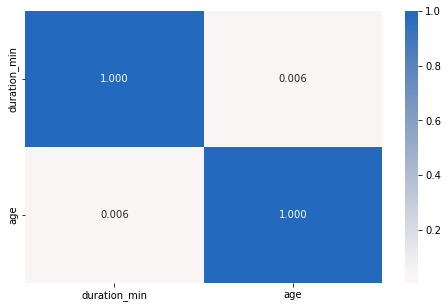

In [36]:
plt.figure(figsize = [8, 5])
sb.heatmap(df_ride[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

From the correlation table above it can be seen that Age and duration of trips in minutes have a minute correlation of 0.006 which is not enough to establish a relationship between this variables.

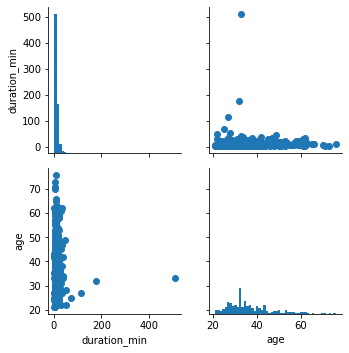

In [37]:
#samples = np.random.choice(df_ride.shape[0], 500, replace = False)
ride_samples= df_ride.sample(500)

g = sb.PairGrid(data = ride_samples, vars = num_vars)
g = g.map_diag(plt.hist, bins = 50)
#plt.xscale('log')
g.map_offdiag(plt.scatter);

Age does not relate trip duration which very suprising because I was expecting younger people to have longer trips compared to older people.

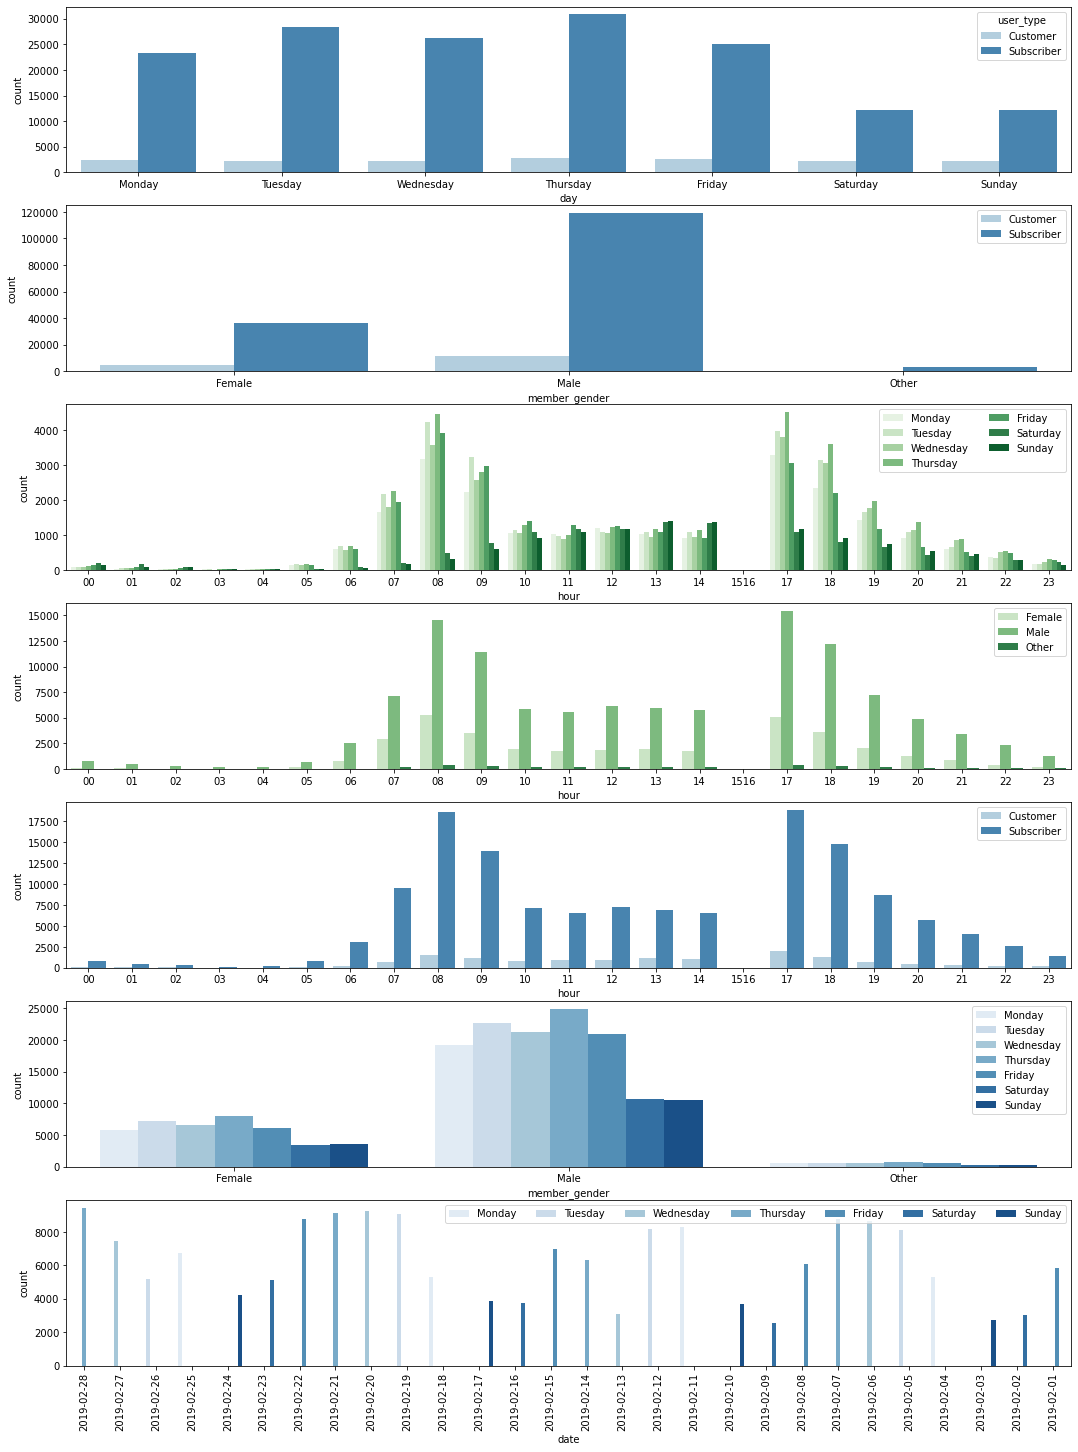

In [38]:

plt.figure(figsize = [18,25])

# subplot 1: weekday vs user_type
plt.subplot(7, 1, 1)
sb.countplot(data = df_ride, x = 'day', hue = 'user_type', palette = 'Blues')

# subplot 2: member_gender vs. user_type
ax = plt.subplot(7, 1, 2)
sb.countplot(data = df_ride, x = 'member_gender', hue = 'user_type', palette = 'Blues')
ax.legend(ncol = 1) # re-arrange legend to reduce overlapping

# subplot 3: hour vs. day
ax = plt.subplot(7, 1, 3)
sb.countplot(data = df_ride, x = 'hour', hue = 'day', palette = 'Greens')
ax.legend(loc = 0, ncol = 2) 

# subplot 4: hour vs. gender
ax = plt.subplot(7, 1, 4)
sb.countplot(data = df_ride, x = 'hour', hue = 'member_gender', palette = 'Greens')
ax.legend(loc = 1, ncol = 1) 

# subplot 5: hour vs. user_type
ax = plt.subplot(7, 1, 5)
sb.countplot(data = df_ride, x = 'hour', hue = 'user_type', palette = 'Blues')
ax.legend(loc = 1, ncol = 1)

# subplot 6: member_gender vs. day
ax = plt.subplot(7, 1, 6)
sb.countplot(data = df_ride, x = 'member_gender', hue = 'day', palette = 'Blues')
ax.legend(loc = 1, ncol = 1) 

# subplot 7: date vs. day
ax = plt.subplot(7, 1, 7)
sb.countplot(data = df_ride, x = 'date', hue = 'day', palette = 'Blues')
ax.legend(loc = 0, ncol = 7) 
plt.xticks(rotation= 90)

plt.show()



From this it is evident that a very small amount of the user that are customers identify as 'other' in the gender category and only a small fraction of the subscribers. Noticeable is the high  rides takes place during the rush hour which when 8:00 and 17:00.It can also be noted that people who identify as female have little or no ride  from hours between 00:00 and 5:00 may be for safety reasons because of the condition of the day.Also there more during the week days at the hours of 08:00 and 17:00. It can also be seen that there were no rides during 15 and 16 hours, this may be because of we have dropped a few rows from the dataset during cleaning. Also there were more rides between 10:00 and 14:00 hours during the weekends.

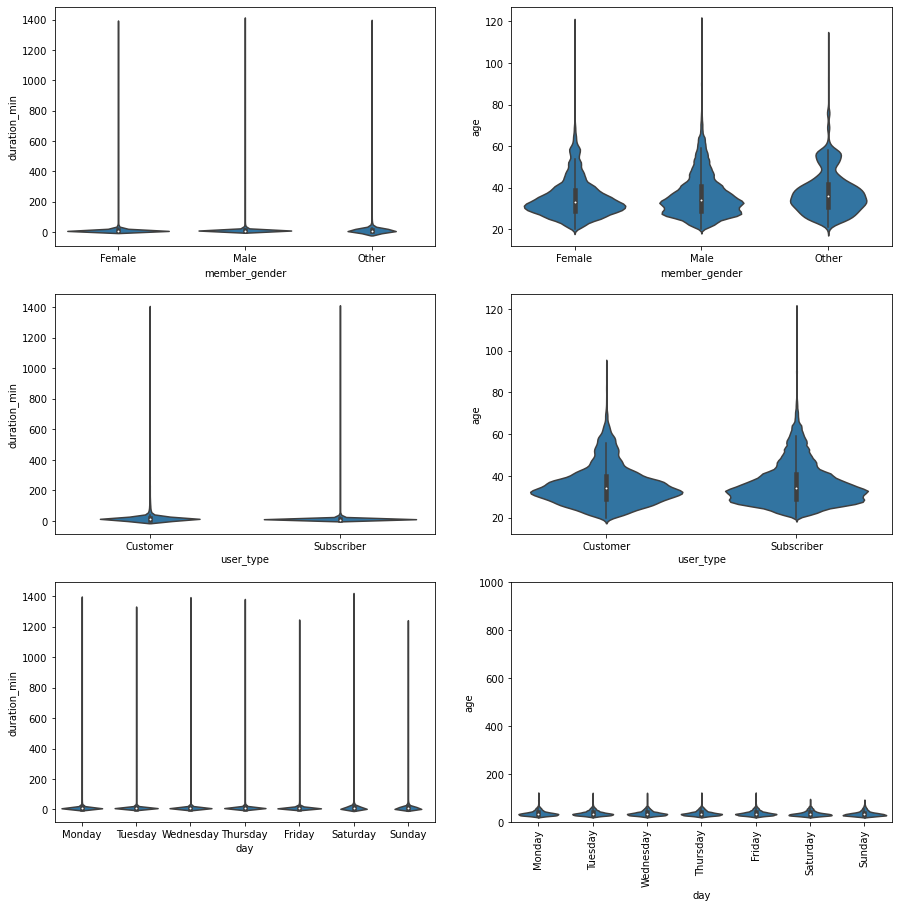

In [39]:
fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [15,15])
cv = ['member_gender','user_type','day']
for i in range(len(cv)):
    var = cv[i]
    sb.violinplot(data = df_ride, x = var, y = 'duration_min', ax = ax[i,0],
               color = default_color, kws={'ylim':(0,1000)})#inner=None
    plt.ylim([0,1000])
    
    sb.violinplot(data = df_ride, x = var, y = 'age', ax = ax[i,1],
               color = default_color )#inner=None
    plt.xticks(rotation = 90)
 
   

This violin plots show the relationship duration_min and age with the some selected categorical variables . The box plot elements show the median duration for weekdays is lower than for weekends. The shape of the age distribution of subscriber and gender(extremely skinny on each end and wide in the middle) indicates the age of members are highly concentrated around the median.Subscribers usage seem to be very consistent and standard. Customers on the other hand tend to use bikes their usage is concentrated during weekends.  

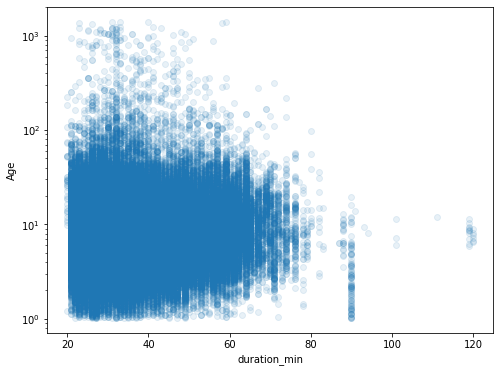

In [40]:
# scatter plot duration_min and age, with log transform on price axis

plt.figure(figsize = [8, 6])
plt.scatter(data = df_ride, x = 'age', y ='duration_min' , alpha = 1/10)
#plt.xlim([0, 5000])
plt.xlabel('duration_min')
plt.yscale('log')
#plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Age')
plt.show()



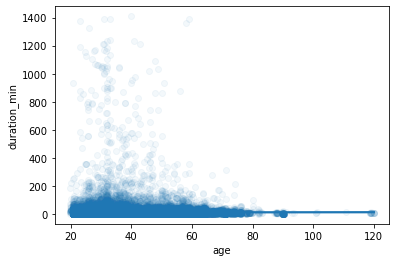

In [41]:
sb.regplot(data = df_ride, x = 'age', y = 'duration_min', x_jitter=0.3, scatter_kws={'alpha':1/20});

Despite that their is a line of best fit in the plot the line is horizontal which means that the age values are irrelevant to the output values which further comfirms our findings from above that there is no correlation between Age and trip duration.

### Relationships and variation of features.
> There are more rides during the week days at the hours of 08:00 and 17:00. it was observed from the violin plot that average trip duration during the weekend is more than during the week
> The shape of the age distribution of subscriber and gender(extremely skinny on each end and wide in the middle) indicates the age of members are highly concentrated around the median.

### Observation of Interest .

> what is most interesting is that i discovered that the age of members are not related to the duration of trips.

### Multivariate Exploration
I want to explore how trip duration is affected by the categorical variables of interest and age

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


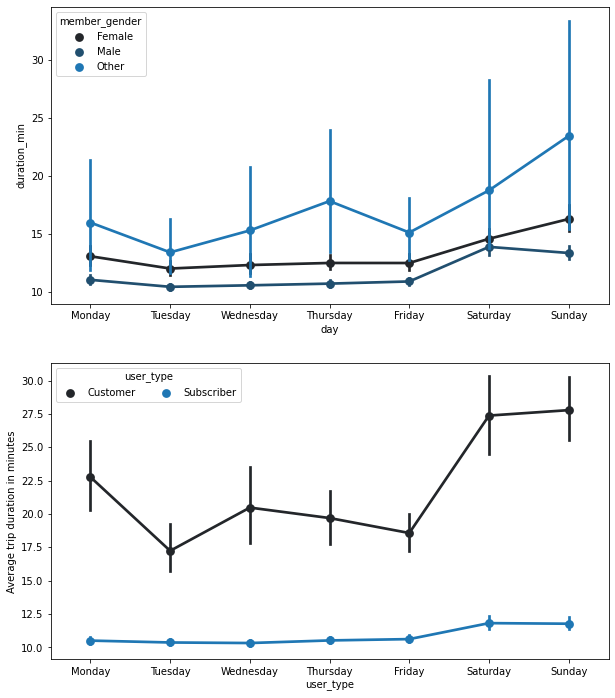

In [42]:
fig, ax = plt.subplots( nrows = 2 , figsize = [10,12])
cv = ['member_gender','user_type']
for i in range(len(cv)):
    var = cv[i]
    sb.pointplot(data=df_ride, x='day', y='duration_min' ,color = default_color, ax = ax[i],hue=var);
    plt.ylabel("Average trip duration in minutes");
    plt.xlabel(f"{var}");
    plt.legend(title=f'{var}', ncol = 2);
    #ax.legend(loc = 1, ncol = 1) 


Average ride duration of subscribers is consistent during the weekdays with a small rise during the weekend. Average ride duration of customers on the hand decrease during the weekdays and increases significantly during the weekend. It is also noted that Average distance travelled by the customers throughout the week is significantly greater than that of the subscribers.

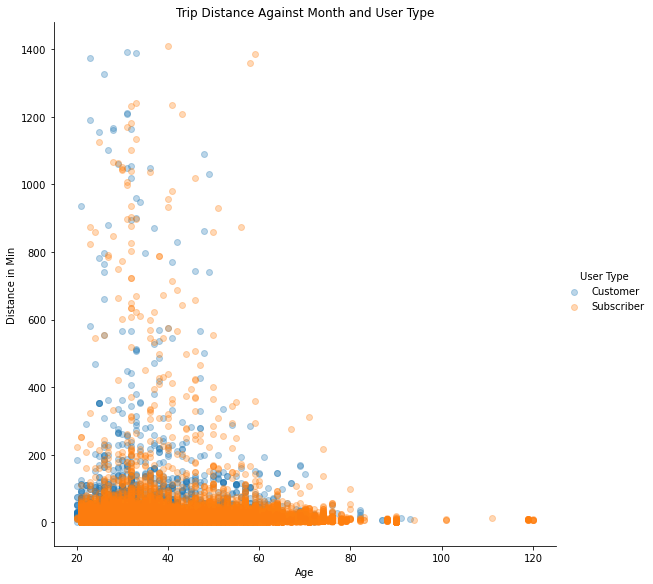

In [43]:
g = sb.FacetGrid(data =  df_ride, hue = 'user_type', height = 8)
g.map(plt.scatter, 'age','duration_min', alpha = 0.3)
g.add_legend(title="User Type");
plt.title('Trip Distance Against Month and User Type');
plt.xlabel('Age');
plt.ylabel('Distance in Min');


we can confirm that there are way more subscribers than customers and the maximum age of members that customers is less than 100 but on average customers have longer trip duration. 

###  Observations

> There are way more subscribers than customers and the maximum age of members that customers is less than 100 but on average customers have longer trip duration.Average ride duration of subscribers is consistent during the weekdays with a small rise during the weekend. Average ride duration of customers on the hand decrease during the weekdays and increases significantly during the weekend
### Interesting  interactions between features?

> Average distance travelled by the customers throughout the week is significantly greater than that of the subscribers.Also despite tha

## Conclusions
> Trip duration was mostly between 6-15 minutes.more trips were made between stations with 700m-4000m eters between them. subscribers were significantly more than customers but the average ride duration of customers is more. contrary to my expectations, Age and trip duration has no relationship.

### Limitations
> Some observations were dropped because they have missing values whch might have skewed our finding during the analysis.

In [44]:
df_ride.to_csv('df_ride.csv', index=False)